In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [ ]:
df.shape

(3590, 18)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience lagoon,sector 24,4.25,13281.0,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,1,143
1,flat,capital residences 360,sector 70,1.18,8138.0,2,2,3,7.0,New Property,1400.0,0,0,0,1,0,0,140
2,flat,umang winter hills,sector 77,0.71,5306.0,2,2,2,6.0,Relatively New,1057.0,1,0,0,0,0,0,108
3,flat,rof ananda,sector 95,0.20,5464.0,1,1,1,10.0,Relatively New,407.0,0,0,0,0,0,0,82
4,flat,shree vardhman flora,sector 90,0.90,4615.0,3,4,3,4.0,Relatively New,1765.0,0,1,0,0,0,0,165


In [ ]:
train_df = df.drop(columns = ['society', 'price_per_sqft'])

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 24,4.25,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,1,143
1,flat,sector 70,1.18,2,2,3,7.0,New Property,1400.0,0,0,0,1,0,0,140
2,flat,sector 77,0.71,2,2,2,6.0,Relatively New,1057.0,1,0,0,0,0,0,108
3,flat,sector 95,0.20,1,1,1,10.0,Relatively New,407.0,0,0,0,0,0,0,82
4,flat,sector 90,0.90,3,4,3,4.0,Relatively New,1765.0,0,1,0,0,0,0,165


<Axes: >

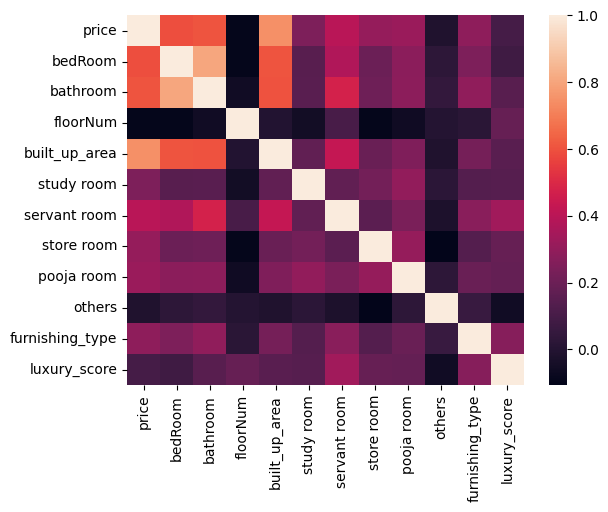

In [ ]:
num_df = train_df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr())

In [ ]:
num_df.corr()['price'].sort_values(ascending = False)

,price
price,1.000000
built_up_area,0.748836
bathroom,0.606203
bedRoom,0.593196
servant room,0.395130
pooja room,0.319246
store room,0.304472
furnishing_type,0.287518
study room,0.244782
luxury_score,0.096329


In [ ]:
# cols in question
# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession

In [ ]:
# convert luxury score to categorical col as it is not logical to take input of this feature as a number from user

In [ ]:
# luxury_score -> 3 categories
# 1. Budget
# 2. Semi-luxury
# 3. Luxury

<Axes: xlabel='luxury_score'>

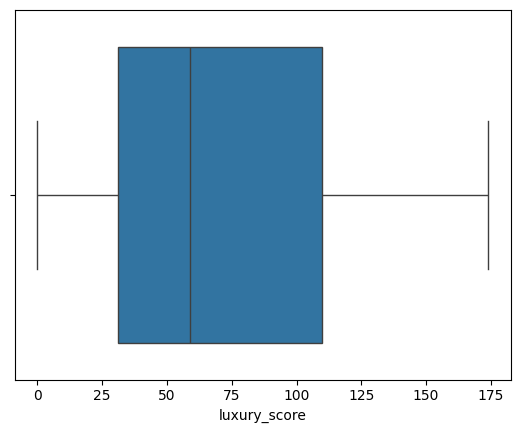

In [ ]:
sns.boxplot(x = df['luxury_score'])

In [ ]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [ ]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 24,4.25,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,1,143,Medium
1,flat,sector 70,1.18,2,2,3,7.0,New Property,1400.0,0,0,0,1,0,0,140,Medium
2,flat,sector 77,0.71,2,2,2,6.0,Relatively New,1057.0,1,0,0,0,0,0,108,Medium
3,flat,sector 95,0.20,1,1,1,10.0,Relatively New,407.0,0,0,0,0,0,0,82,Medium
4,flat,sector 90,0.90,3,4,3,4.0,Relatively New,1765.0,0,1,0,0,0,0,165,High


In [ ]:
# floor Num -> we don't want to ask specific question about floors
# convert it to categorical

<Axes: ylabel='floorNum'>

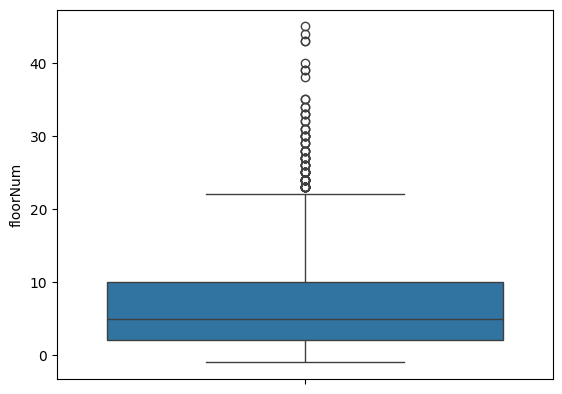

In [ ]:
sns.boxplot(df['floorNum'])

In [ ]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [ ]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 24,4.25,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,1,143,Medium,Mid Floor
1,flat,sector 70,1.18,2,2,3,7.0,New Property,1400.0,0,0,0,1,0,0,140,Medium,Mid Floor
2,flat,sector 77,0.71,2,2,2,6.0,Relatively New,1057.0,1,0,0,0,0,0,108,Medium,Mid Floor
3,flat,sector 95,0.20,1,1,1,10.0,Relatively New,407.0,0,0,0,0,0,0,82,Medium,Mid Floor
4,flat,sector 90,0.90,3,4,3,4.0,Relatively New,1765.0,0,1,0,0,0,0,165,High,Mid Floor


In [ ]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 24,4.25,3,4,3+,Old Property,3201.0,0,1,0,1,0,1,Medium,Mid Floor
1,flat,sector 70,1.18,2,2,3,New Property,1400.0,0,0,0,1,0,0,Medium,Mid Floor
2,flat,sector 77,0.71,2,2,2,Relatively New,1057.0,1,0,0,0,0,0,Medium,Mid Floor
3,flat,sector 95,0.20,1,1,1,Relatively New,407.0,0,0,0,0,0,0,Medium,Mid Floor
4,flat,sector 90,0.90,3,4,3,Relatively New,1765.0,0,1,0,0,0,0,High,Mid Floor


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Dictionary to store encoders for each column
encoders = {}

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    encoders[col] = oe  # store the encoder
    print(f"{col}: {oe.categories_}")

property_type: [array(['flat', 'house'], dtype=object)]
sector: [array(['dwarka', 'gwal pahari', 'manesar', 'sector 1', 'sector 10',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 11', 'sector 110', 'sector 111', 'sector 112',
       'sector 113', 'sector 12', 'sector 13', 'sector 14', 'sector 15',
       'sector 17', 'sector 2', 'sector 21', 'sector 22', 'sector 23',
       'sector 24', 'sector 25', 'sector 26', 'sector 27', 'sector 28',
       'sector 3', 'sector 30', 'sector 31', 'sector 33', 'sector 36',
       'sector 37', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sector 53', 'sector 54', 'sector 55', 'sector 56',
       'sector 57', 'sector 58', 'sector 59', 'sector 6', 'sector 60',
       'sector 61', 'sector 62', 's

In [ ]:
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [ ]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,27.0,3,4,4.0,2.0,3201.0,0,1,0,1,0,1,2.0,2.0
1,0.0,71.0,2,2,3.0,1.0,1400.0,0,0,0,1,0,0,2.0,2.0
2,0.0,77.0,2,2,2.0,3.0,1057.0,1,0,0,0,0,0,2.0,2.0
3,0.0,95.0,1,1,1.0,3.0,407.0,0,0,0,0,0,0,2.0,2.0
4,0.0,91.0,3,4,3.0,3.0,1765.0,0,1,0,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,0.0,91.0,4,4,4.0,0.0,2200.0,0,1,0,1,0,0,2.0,0.0
3586,0.0,91.0,3,3,3.0,3.0,1603.0,0,0,0,0,1,1,1.0,2.0
3587,0.0,35.0,3,4,1.0,3.0,1421.0,0,1,0,0,0,0,1.0,1.0
3588,1.0,90.0,4,3,1.0,2.0,200.0,0,0,0,0,0,0,1.0,1.0


In [ ]:
y_label

,price
0,4.25
1,1.18
2,0.71
3,0.20
4,0.90
...,...
3585,1.54
3586,1.26
3587,1.55
3588,1.10


In [ ]:
# apply diff feature selection techniques-> take avg or sum of scores

<Axes: >

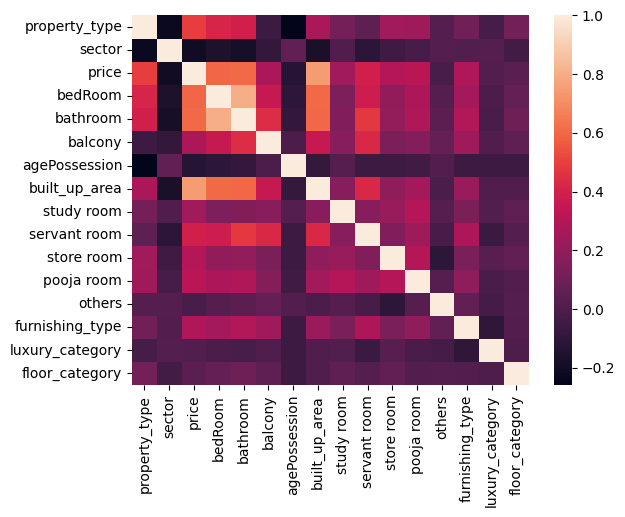

In [ ]:
# technique -> 1: correlation
sns.heatmap(data_label_encoded.corr())

In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202180
1,price,1.000000
2,bedRoom,0.593196
3,bathroom,0.606203
4,balcony,0.271975
5,agePossession,-0.133910
6,built_up_area,0.748836
7,study room,0.244782
8,servant room,0.395130
9,store room,0.304472


In [ ]:
# technique-2 : random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.653867
0,property_type,0.104905
1,sector,0.101320
2,bedRoom,0.024546
3,bathroom,0.022096
8,servant room,0.018358
5,agePossession,0.014406
4,balcony,0.012616
12,furnishing_type,0.010697
9,store room,0.008989


In [ ]:
# technique-3 : gradient boosting feature importance

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.681561
1,sector,0.099695
0,property_type,0.090910
2,bedRoom,0.047576
3,bathroom,0.029212
8,servant room,0.023372
9,store room,0.010984
12,furnishing_type,0.004969
7,study room,0.004609
5,agePossession,0.004468


In [ ]:
# technique-4 : permutation importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.699783
0,property_type,0.207577
1,sector,0.151482
8,servant room,0.019774
2,bedRoom,0.015871
3,bathroom,0.009949
7,study room,0.002732
9,store room,0.002131
14,floor_category,0.001894
4,balcony,0.001883


In [ ]:
# technique-5 : LASSO -> not much reliable as we have done ordinal encoding

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.509634
0,property_type,0.688299
3,bathroom,0.247096
12,furnishing_type,0.203182
9,store room,0.202275
7,study room,0.170984
8,servant room,0.158944
10,pooja room,0.074472
13,luxury_category,0.063622
2,bedRoom,0.053569


In [ ]:
# technique-6 : RFE

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.648413
0,property_type,0.105647
1,sector,0.100732
2,bedRoom,0.025275
3,bathroom,0.024031
8,servant room,0.019563
5,agePossession,0.014512
4,balcony,0.012116
12,furnishing_type,0.010005
9,store room,0.008674


In [ ]:
# technique-7 : linear regression weights -> again not reliable

In [ ]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.511613
0,property_type,0.687973
3,bathroom,0.254005
12,furnishing_type,0.212470
9,store room,0.206780
7,study room,0.179073
8,servant room,0.167970
10,pooja room,0.077620
13,luxury_category,0.075024
2,bedRoom,0.055963


In [ ]:
!pip install shap

In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.03848120e+00,  2.28401133e-01, -3.03595085e-02, ...,
         3.49206940e-02, -8.50238574e-03, -1.19902849e-02],
       [-1.92296167e-01, -8.54479981e-02, -6.30237761e-02, ...,
        -1.97169827e-02, -6.44560857e-03, -1.47156101e-02],
       [-1.75617116e-01, -1.86089961e-01, -5.13208910e-02, ...,
        -2.39785472e-02, -5.84031360e-04, -3.68256614e-03],
       ...,
       [-2.81914184e-01,  1.94022842e-01, -1.95227654e-02, ...,
        -2.38706125e-02,  2.79265362e-03, -3.08137418e-02],
       [ 4.47810735e-01, -4.19718915e-01,  8.70118720e-02, ...,
        -3.40036384e-02, -5.43071457e-03, -2.25914224e-03],
       [-2.10303706e-01,  4.91781984e-02, -1.93802510e-02, ...,
        -1.52901685e-02,  8.72890761e-03, -1.18114839e-03]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.254047
0,property_type,0.479677
1,sector,0.377358
8,servant room,0.093195
3,bathroom,0.092807
2,bedRoom,0.064701
4,balcony,0.040983
12,furnishing_type,0.040973
5,agePossession,0.028241
14,floor_category,0.024901


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [ ]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.202180,0.101320,0.099695,0.151482,-0.060383,0.100732,-0.069650,0.377358
bedRoom,0.593196,0.024546,0.047576,0.015871,0.053569,0.025275,0.055963,0.064701
bathroom,0.606203,0.022096,0.029212,0.009949,0.247096,0.024031,0.254005,0.092807
balcony,0.271975,0.012616,0.001756,0.001883,-0.052180,0.012116,-0.075114,0.040983
agePossession,-0.133910,0.014406,0.004468,-0.003913,-0.000000,0.014512,-0.000604,0.028241
built_up_area,0.748836,0.653867,0.681561,0.699783,1.509634,0.648413,1.511613,1.254047
study room,0.244782,0.008384,0.004609,0.002732,0.170984,0.008378,0.179073,0.020480
servant room,0.395130,0.018358,0.023372,0.019774,0.158944,0.019563,0.167970,0.093195
store room,0.304472,0.008989,0.010984,0.002131,0.202275,0.008674,0.206780,0.018050


In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
# avg feature importance
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.717510
sector,0.137097
bedRoom,0.031350
bathroom,0.027857
servant room,0.026968
balcony,0.010264
agePossession,0.009281
furnishing_type,0.008626
store room,0.008571


In [ ]:
# to drop -> pooja room, study room, others

In [ ]:
# we can't drop them directly first we need to make sure that deleting them doesn't cause any harm

In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

np.float64(0.8085526809784819)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

np.float64(0.813734063378905)

In [ ]:
# we proved that pooja room, study room, others are not important

In [ ]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [ ]:
data_label_encoded

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,27.0,4.25,3,4,4.0,2.0,3201.0,0,1,0,1,0,1,2.0,2.0
1,0.0,71.0,1.18,2,2,3.0,1.0,1400.0,0,0,0,1,0,0,2.0,2.0
2,0.0,77.0,0.71,2,2,2.0,3.0,1057.0,1,0,0,0,0,0,2.0,2.0
3,0.0,95.0,0.20,1,1,1.0,3.0,407.0,0,0,0,0,0,0,2.0,2.0
4,0.0,91.0,0.90,3,4,3.0,3.0,1765.0,0,1,0,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,0.0,91.0,1.54,4,4,4.0,0.0,2200.0,0,1,0,1,0,0,2.0,0.0
3586,0.0,91.0,1.26,3,3,3.0,3.0,1603.0,0,0,0,0,1,1,1.0,2.0
3587,0.0,35.0,1.55,3,4,1.0,3.0,1421.0,0,1,0,0,0,0,1.0,1.0
3588,1.0,90.0,1.10,4,3,1.0,2.0,200.0,0,0,0,0,0,0,1.0,1.0


In [ ]:
# Create a copy to decode
decoded_df = data_label_encoded.copy()

# Apply inverse_transform to revert encoding
for col in categorical_cols:
    oe = encoders[col]
    decoded_col = oe.inverse_transform(decoded_df[[col]].values.astype(float))
    decoded_df[col] = decoded_col.ravel()  # flatten to 1D for assignment


In [ ]:
decoded_df

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 24,4.25,3,4,3+,Old Property,3201.0,0,1,0,1,0,1,Medium,Mid Floor
1,flat,sector 70,1.18,2,2,3,New Property,1400.0,0,0,0,1,0,0,Medium,Mid Floor
2,flat,sector 77,0.71,2,2,2,Relatively New,1057.0,1,0,0,0,0,0,Medium,Mid Floor
3,flat,sector 95,0.20,1,1,1,Relatively New,407.0,0,0,0,0,0,0,Medium,Mid Floor
4,flat,sector 90,0.90,3,4,3,Relatively New,1765.0,0,1,0,0,0,0,High,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,flat,sector 90,1.54,4,4,3+,Moderately Old,2200.0,0,1,0,1,0,0,Medium,High Floor
3586,flat,sector 90,1.26,3,3,3,Relatively New,1603.0,0,0,0,0,1,1,Low,Mid Floor
3587,flat,sector 33,1.55,3,4,1,Relatively New,1421.0,0,1,0,0,0,0,Low,Low Floor
3588,house,sector 9,1.10,4,3,1,Old Property,200.0,0,0,0,0,0,0,Low,Low Floor


In [69]:
decoded_df.drop(columns=['pooja room', 'study room', 'others'], inplace = True)

In [70]:
decoded_df.to_csv('gurgaon_properties_post_feature_selection_v2.csv', index = False)